In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append("./../python")
import pretraitement

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [2]:
DATA_x = pd.read_csv('data/X_train_G3tdtEn.csv', delimiter = ',',encoding = 'latin1', low_memory=False)
DATA_y = pd.read_csv('data/Y_train_2_XPXJDyy.csv', delimiter = ',',encoding = 'latin1', low_memory=False)

C:\Users\kille\AppData\Local\Temp\ipykernel_23504\2876525926.py:1: DtypeWarning: Columns (21,22,23,24,69,70,71,72,93,94,95,96,97,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120) have mixed types. Specify dtype option on import or set low_memory=False.
  DATA_x = pd.read_csv('data/X_train_G3tdtEn.csv', delimiter = ',',encoding = 'latin1')


In [34]:
tab_item_X, tab_make_X = pretraitement.get_item_make_arrays(DATA_x)

In [35]:
print("Nombre de catégories : ", len(tab_item_X))
print("Nombre de marques : ", len(tab_make_X))
print("Taille du pandasframe : ", DATA_x.shape)

Nombre de catégories :  174
Nombre de marques :  830
Taille du pandasframe :  (92790, 146)


In [36]:
DATA_x_make= pretraitement.dataframe_make(DATA_x,tab_make_X)


In [37]:
# Rajout de la colonne "Nb_of_items" 
DATA_x_make['Nb_of_items'] = DATA_x['Nb_of_items']

# Rajoute les colonnes "cash_price1", "cash_price2", ..., "cash_price24"
cash_price_columns = ["cash_price" + str(i) for i in range(1, 25)]
X_cash_price = DATA_x[cash_price_columns]
DATA_x_make = pd.concat([DATA_x_make, X_cash_price], axis=1)

# Dans le doute où le modèle ne sait pas gérer les NaN et les cases vides, on remplace par des 0.
DATA_x_make = DATA_x_make.fillna(0)

In [38]:
print("Taille du pandasframe : ", DATA_x_make.shape)

Taille du pandasframe :  (92790, 855)


In [39]:
# Séparation des données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(DATA_x_make, DATA_y['fraud_flag'], test_size=0.3, random_state=42)

In [40]:

# Initialisation d'un modèle de forêt aléatoire
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Apprentissage du modèle sur l'ensemble de formation
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [41]:
# Prédiction sur l'ensemble de test
y_pred = clf.predict(X_test)

In [ ]:
# extraction de l'importance relative des variables
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# affichage des variables et de leur importance relative
print("Importance des variables :")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# affichage d'un histogramme de l'importance relative des variables
plt.figure()
plt.title("Importance des variables")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [24]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)

print(average_precision)

0.051286440115104456


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, average_precision_score

# Paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Création de l'estimateur
rfc = RandomForestClassifier(random_state=42)

# Définition de la fonction de score
scorer = make_scorer(average_precision_score, greater_is_better=True)

# Recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(rfc, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

# Affichage des résultats
print("Meilleurs hyperparamètres :")
print(grid_search.best_params_)
print("Meilleur score :")
print(grid_search.best_score_)

Meilleurs hyperparamètres :
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Meilleur score :
0.01881264718878599


In [28]:
# Initialisation d'un modèle de forêt aléatoire
clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=30, min_samples_leaf=1,min_samples_split=2)

# Apprentissage du modèle sur l'ensemble de formation
clf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = clf.predict(X_test)

average_precision = average_precision_score(y_test, y_pred)

print(average_precision)

0.018279337276456007


# Envie de tester avec les prix uniquements

In [ ]:
cash_price_columns = ["cash_price" + str(i) for i in range(1, 4)]
nbr_columns = ["Nbr_of_prod_purchas" + str(i) for i in range(1, 4)]

selection_colonnes = ['ID'] + cash_price_columns
df_prices = DATA_x[selection_colonnes]
df_prices = pd.merge(df_prices, DATA_y, on='ID')
df_prices = df_prices.drop("ID", axis=1)
df_prices = df_prices.drop("index",axis=1)
df_prices

In [4]:
Y = df_prices['fraud_flag']
X = df_prices.drop("fraud_flag", axis=1)

In [5]:
X = X.fillna(0)

In [7]:
# Séparation des données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression


# Création de l'objet de modèle
model = xgb.XGBClassifier()
model2 = LogisticRegression()

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)

In [11]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)
average_precision2 = average_precision_score(y_test, y_pred2)

print("XGB booster average_precision :", average_precision)
print("logistic average_precision :", average_precision2)

XGB booster average_precision : 0.041873907491766255
logistic average_precision : 0.014656751805151417


In [61]:

# Initialisation d'un modèle de forêt aléatoire
clf = RandomForestClassifier(n_estimators=250, random_state=42)

# Apprentissage du modèle sur l'ensemble de formation
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=250, random_state=42)

In [62]:
# Prédiction sur l'ensemble de test
y_pred = clf.predict(X_test)

In [63]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)

print(average_precision)

0.04409784767447231


Importance des variables :
1. cash_price1 (0.535108)
2. cash_price2 (0.396550)
3. cash_price3 (0.068342)


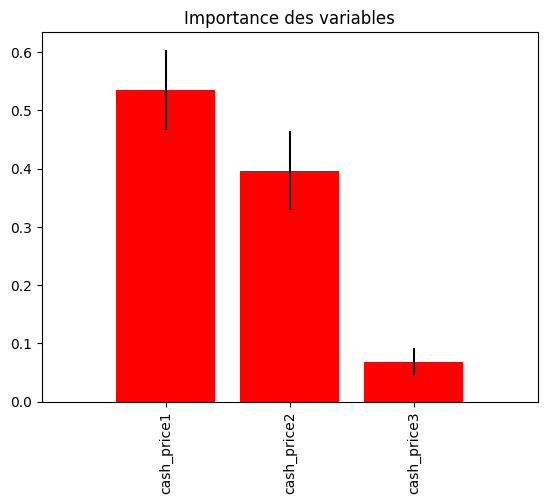

In [64]:
# extraction de l'importance relative des variables
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# affichage des variables et de leur importance relative
print("Importance des variables :")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# affichage d'un histogramme de l'importance relative des variables
plt.figure()
plt.title("Importance des variables")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [5]:
exemple = pd.read_csv("data/Y_test_random_2.csv", delimiter = ',', encoding = 'latin1')

exemple

,index,ID,fraud_flag
0,0,64707,0.165105
1,1,63919,0.284590
2,2,15664,0.497070
3,3,6626,0.491428
4,4,26766,0.994971
...,...,...,...
23193,23193,63474,0.983022
23194,23194,80438,0.705398
23195,23195,29485,0.689810
23196,23196,59838,0.882254


### Test Random Forest sur la BDD simplifiée

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

X = pd.read_csv("data/X_train_BNP_simplif.csv", delimiter = ',', encoding='latin1', index_col=0)
Y = pd.read_csv("data/Y_train_2_XPXJDyy.csv", delimiter = ',', encoding='latin1', index_col=0)

In [6]:
# Vérifier si les colonnes 'ID' de X et Y contiennent les mêmes valeurs dans le même ordre
if (X['ID'] == Y['ID']).all():
    print("Les lignes de X et Y sont dans le même ordre")
else:
    print("Les lignes de X et Y ne sont pas dans le même ordre")

Les lignes de X et Y sont dans le même ordre


In [7]:
X = X.drop('ID',axis=1)
Y = Y.drop('ID',axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
Y_train

,fraud_flag
index,
12214,0
21619,0
18886,0
85690,1
30417,0
...,...
6265,0
54886,0
76820,0


In [11]:
# Vérifier si les index sont identiques
if (X_test.index == Y_test.index).all():
    print("Les index de X_train et Y_train sont identiques.")
else:
    print("Les index de X_train et Y_train ne sont pas identiques.")

Les index de X_train et Y_train sont identiques.


In [18]:
rfc = RandomForestClassifier(n_estimators=250, min_samples_split = 5, min_samples_leaf = 9, max_features= None, max_depth=9, bootstrap=True)

In [19]:
rfc.fit(X_train, Y_train)

C:\Users\kille\AppData\Local\Temp\ipykernel_13052\1640918255.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


RandomForestClassifier(max_depth=9, max_features=None, min_samples_leaf=9,
                       min_samples_split=5, n_estimators=250)

In [20]:
y_pred = rfc.predict(X_test)

In [22]:
Y_test_tab= Y_test.values.ravel()

In [26]:
print(average_precision_score(Y_test_tab, y_pred))

0.022844572681966418


In [ ]:
rfc = RandomForestClassifier(n_estimators=250, min_samples_split = 5, min_samples_leaf = 9, max_features= None, max_depth=9, bootstrap=True)